# Graphing Loss

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

#### Functions For Reading the Data

In [22]:
"""
Takes a json file that is formated in the programs output form.
Returns the list of hyperparameters used to run the model and a dataframe of the recorded metrics.
"""
def json_to_dataframe(json_file):
    f = open(json_file)
    data = json.load(f)
    hyper_parameters = data.pop('Hyper Parameters')
    df = pd.DataFrame.from_dict(data)
    return hyper_parameters, df

"""
Takes an array of json files (generated from the model) and a specified column 
Returns a dataframe of the coulmns from the datasets.
"""
def merge_on_column(json_file_array, column):
    merged_df = pd.DataFrame()
    for json_file in json_file_array:
        hyper_paramters, df = json_to_dataframe(json_file)
        column_name = str(hyper_paramters[-2]) + ', ' + str(hyper_paramters[-1]) + ' ' + column # Coulumn Title
        merged_df[column_name] = df[column]
    return merged_df

"""
Takes a metric label.
Returns a list of dataframes with the values of that metric.
"""
def df_merge_on_metric(metric):
    df_01 = merge_on_column(['s01(1).json', 's01.json', 's01(1)(1).json', 's01(1)(1)(1).json'], metric)
    df_27 = merge_on_column(['s27(1).json', 's27.json', 's27(1)(1).json', 's27(1)(1)(1).json'], metric)
    df_46 = merge_on_column(['s46(1).json', 's46.json', 's46(1)(1).json', 's46(1)(1)(1).json'], metric)
    df_89 = merge_on_column(['s89(1).json', 's89.json', 's89(1)(1).json', 's89(1)(1)(1).json'], metric)
    dfs = [df_01, df_27, df_46, df_89]
    return dfs

### Plotting Functions

### Plotting Losss Over All

In [23]:
loss_dfs = df_merge_on_metric("Loss")

In [24]:
plt.rcParams["figure.figsize"] = (40,20)

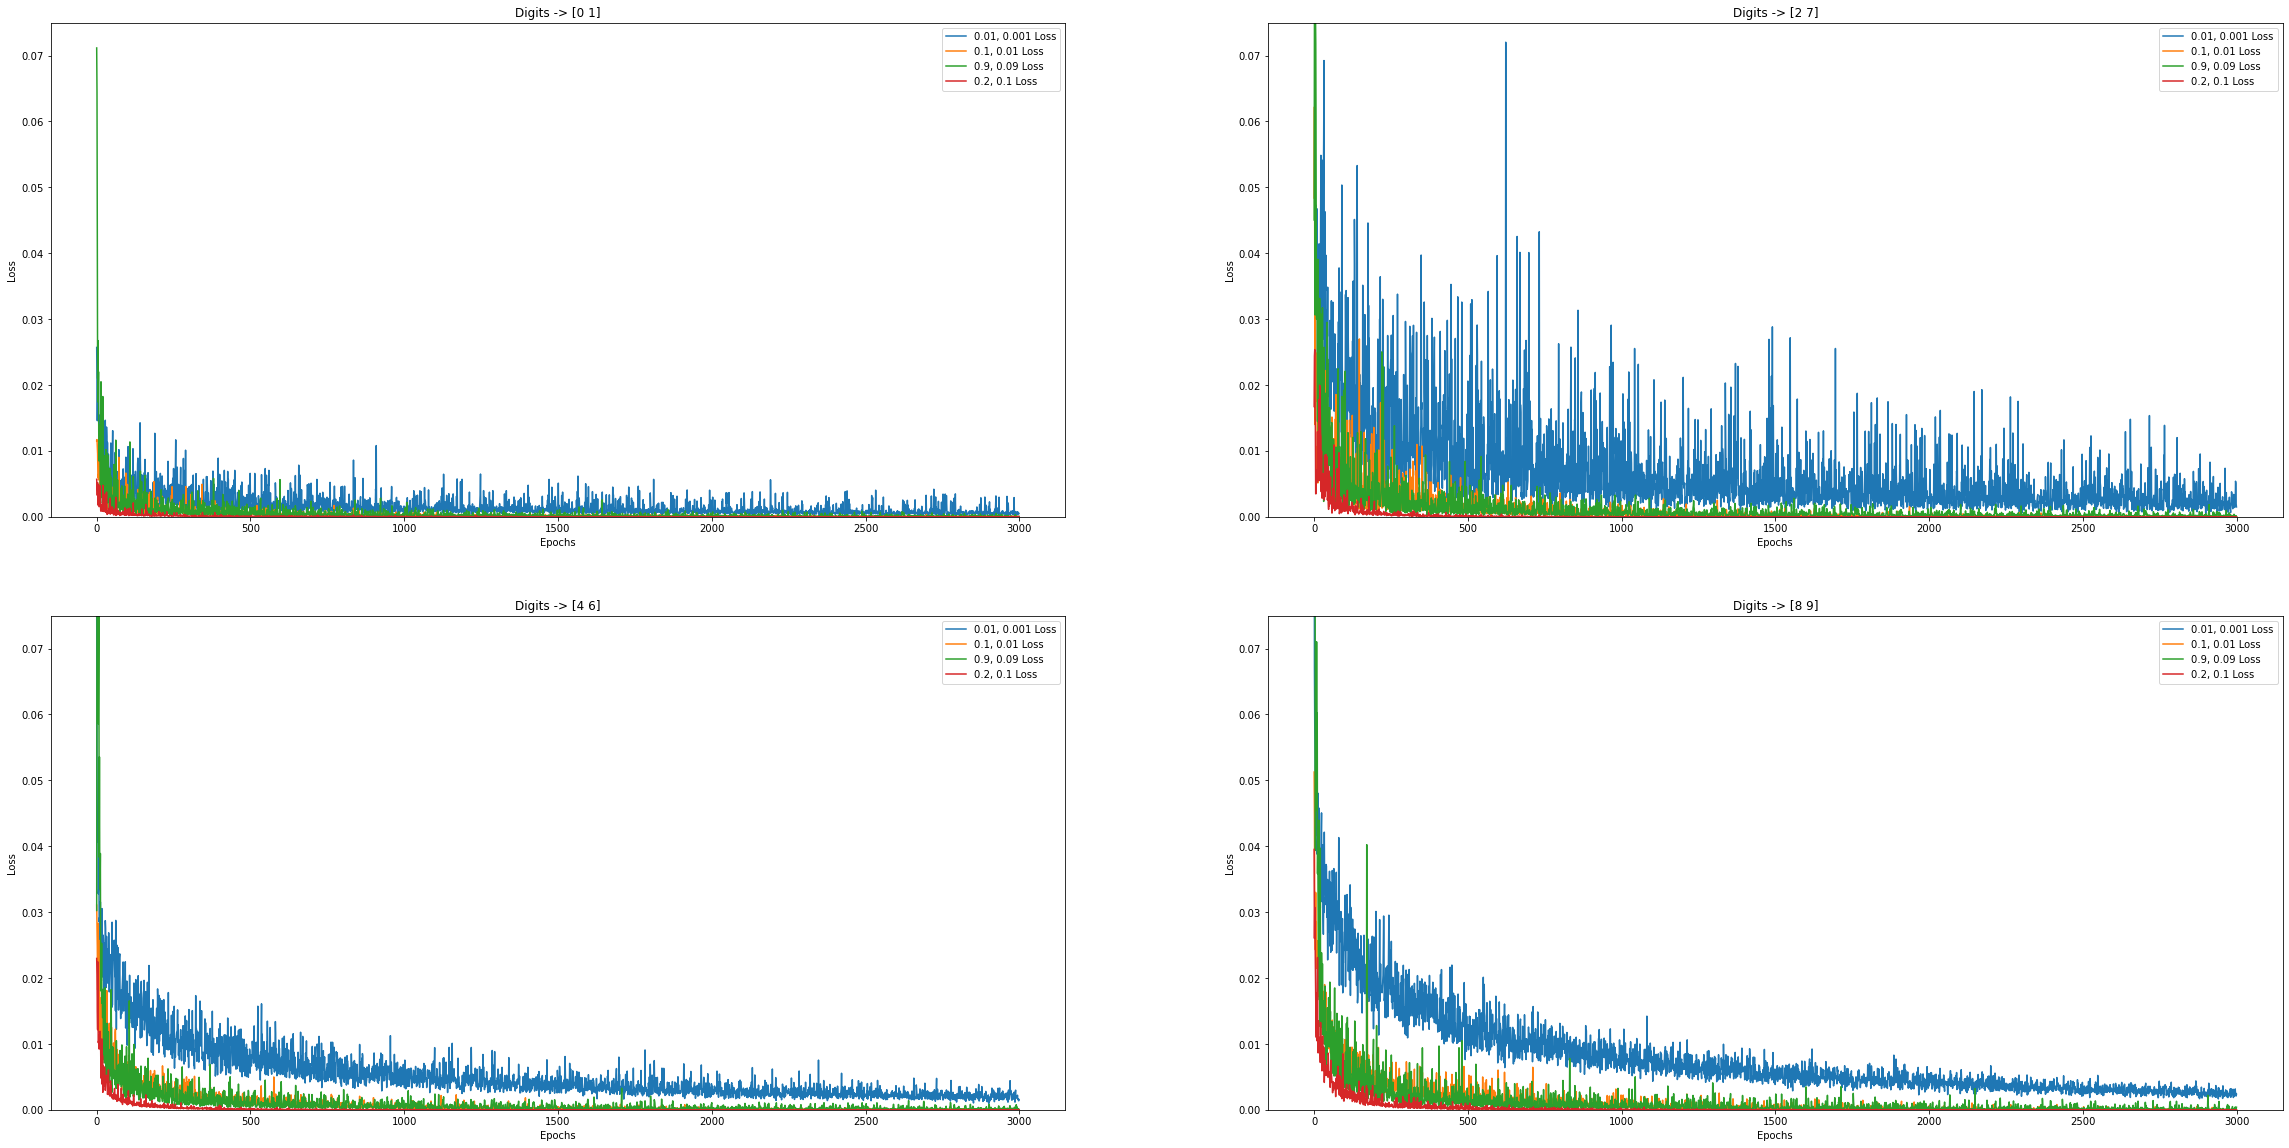

In [25]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylim([0, 0.075])
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epochs')
    loss_dfs[i].plot(ax=ax)



### Plotting Accuracy Over All

In [26]:
val_dfs = df_merge_on_metric("Validation Accuracy")

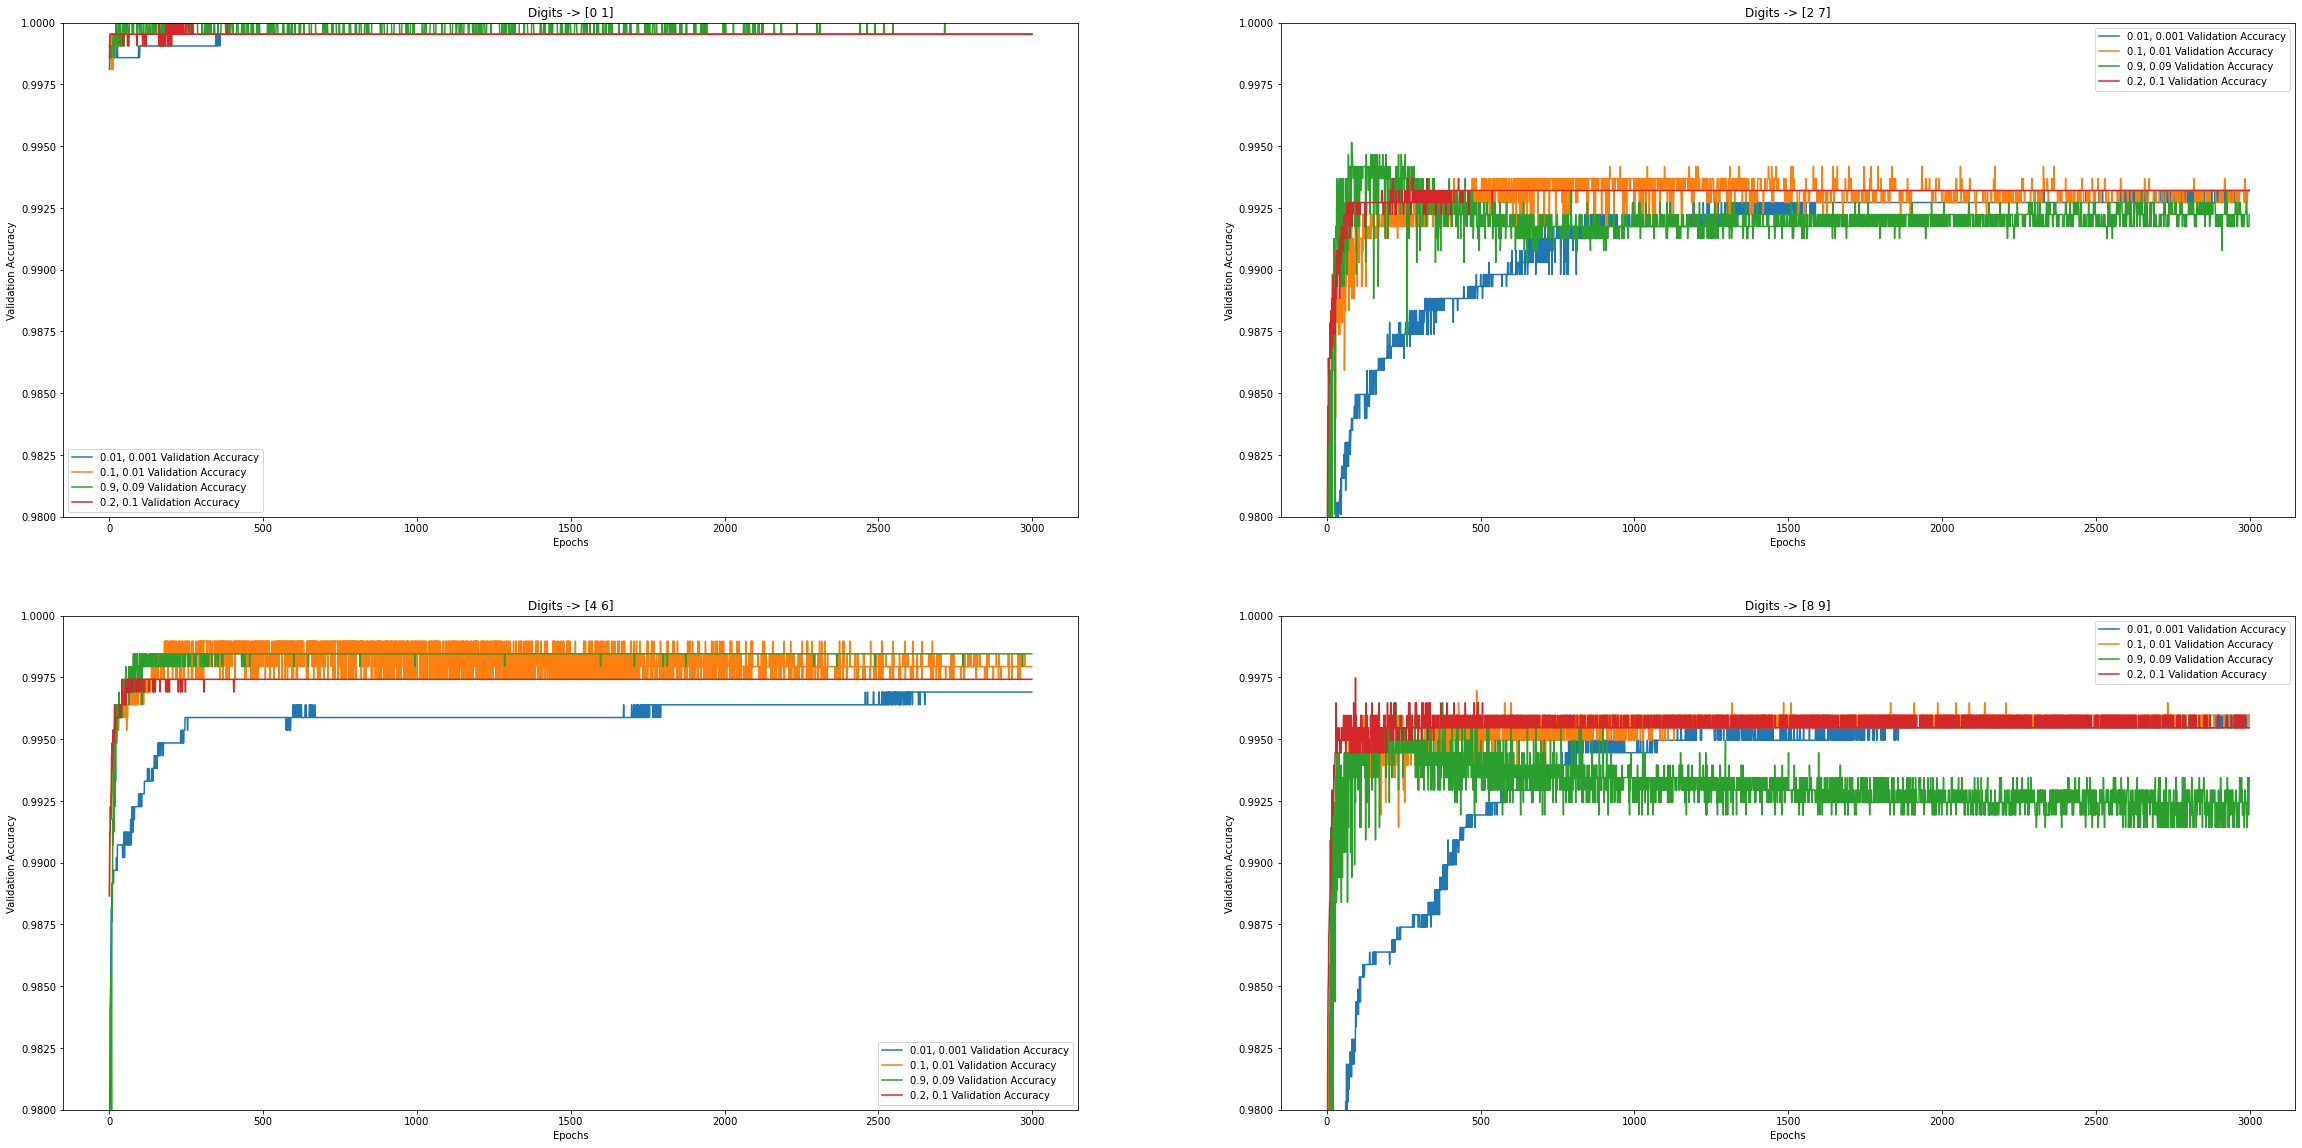

In [27]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylabel('Validation Accuracy')
    ax.set_xlabel('Epochs')
    ax.set_ylim([0.98, 1])
    val_dfs[i].plot(ax=ax)



### Plotting CKA Over All

In [28]:
cka_dfs = df_merge_on_metric("Centered Kernel Alignment")

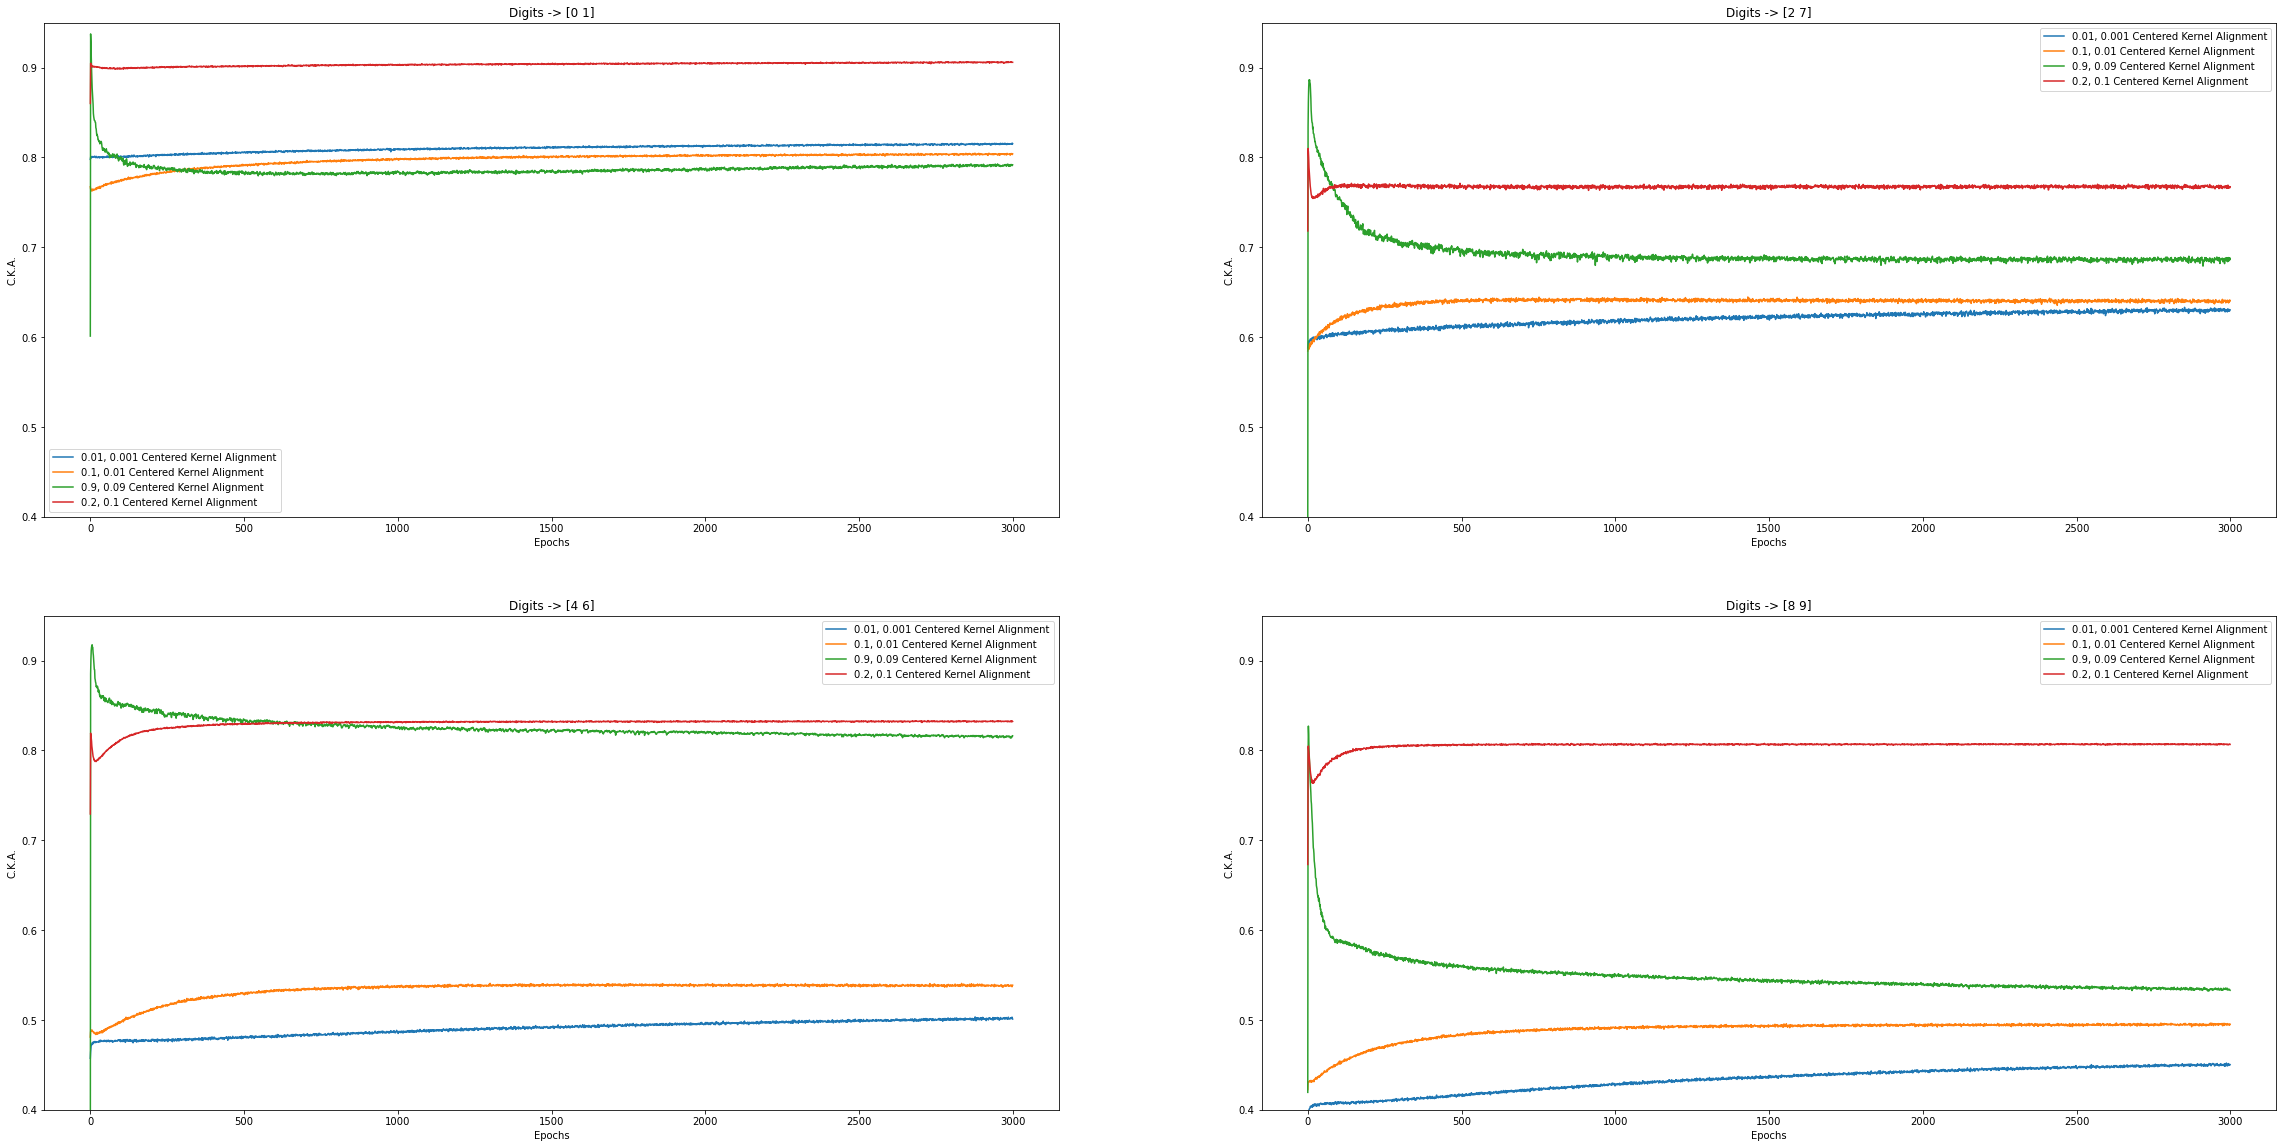

In [29]:
nrow = 2
ncol = 2
fig, axes = plt.subplots(2, 2)
title = ["[0 1]",  "[2 7]", "[4 6]", "[8 9]"]

for i, ax in enumerate(axes.ravel()):
    ax.set_title(f"Digits -> {title[i]}")
    ax.set_ylabel('C.K.A.')
    ax.set_xlabel('Epochs')
    ax.set_ylim([0.4, 0.95])
    cka_dfs[i].plot(ax=ax)